# Task #1: UMAP of enhancer activity

You have a set of 209,040 enhancer candidate cis-regulatory elements (cCREs) that are annotated with H3K27ac signal across 66 mouse samples. H3K27ac is a histone mark associated with enhancer activity.

Datasets

Mouse matrix: http://users.wenglab.org/moorej3/Yu-Project/Mouse-Enhancer-Matrix.txt
○	Matrix of H3K27ac signal at 209,040 distal enhancers across 66 mouse developmental timepoints
○	Each column name has tissue and time point corresponding to one experiment

Tasks:
1. Run UMAP to cluster mouse experiments using H3K27ac signal at mouse enhancers

Be cognizant of normalizing data:

    Should take log of signal + small pseudocount
    Should normalize data (such as standard scale in scikit) within experiment
    
a. Try testing different parameters such as perplexity to obtain the best figure

b. Create scatterplots of results with:
    
    Color points by tissue
    Shape point by timepoint
    
c. Write a brief summary (~ 1 paragraph) of your results.

# Download the data

In [1]:
#%%bash
#wget \
#  -O "Mouse-Enhancer-Matrix.txt" \
#  "http://users.wenglab.org/moorej3/Yu-Project/Mouse-Enhancer-Matrix.txt"

# import modules

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import umap
from umap import UMAP
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import join, exists, expandvars
import pandas as pd
from IPython.display import display, Markdown
%matplotlib inline

In [3]:
#import data as dataframe
matrix=pd.read_csv("Mouse-Enhancer-Matrix.txt", sep = '\t')

# we can save plots in this directory
outdir = join("plots")
if not os.path.exists(outdir):
    os.makedirs(outdir)

In [4]:
#peak at data
matrix[0:]

,ccres,C57BL/6_embryonic_facial_prominence_embryo_11.5_days,C57BL/6_embryonic_facial_prominence_embryo_12.5_days,C57BL/6_embryonic_facial_prominence_embryo_13.5_days,C57BL/6_embryonic_facial_prominence_embryo_14.5_days,C57BL/6_embryonic_facial_prominence_embryo_15.5_days,C57BL/6_forebrain_embryo_11.5_days,C57BL/6_forebrain_embryo_12.5_days,C57BL/6_forebrain_embryo_13.5_days,C57BL/6_forebrain_embryo_14.5_days,...,C57BL/6_midbrain_postnatal_0_days,C57BL/6_neural_tube_embryo_11.5_days,C57BL/6_neural_tube_embryo_12.5_days,C57BL/6_neural_tube_embryo_13.5_days,C57BL/6_neural_tube_embryo_14.5_days,C57BL/6_neural_tube_embryo_15.5_days,C57BL/6_stomach_embryo_14.5_days,C57BL/6_stomach_embryo_15.5_days,C57BL/6_stomach_embryo_16.5_days,C57BL/6_stomach_postnatal_0_days
0,EM10D0024807,0.737987,0.496333,0.394944,0.608239,0.519169,0.476346,0.469204,0.728918,0.526971,...,0.651397,0.531423,0.782652,0.606512,0.465679,0.559411,0.489681,0.728980,1.047850,1.142360
1,EM10D0062280,0.737908,0.756066,0.619545,0.840945,0.786815,1.235750,1.365740,1.077090,0.811603,...,0.935929,1.176740,1.049060,0.934667,1.252420,1.090870,0.949902,0.745198,0.767133,0.862137
2,EM10D0073850,0.366271,0.901060,0.695672,0.345374,0.596921,1.018470,1.055840,0.776323,0.829389,...,0.645772,0.855515,0.890337,0.610279,0.783446,0.673417,0.752583,0.868450,0.685157,0.370126
3,EM10D0135775,0.531865,0.987585,0.451908,0.425011,0.790187,0.462021,0.838769,0.646874,0.505505,...,0.386949,0.759358,0.795779,0.583168,0.539668,0.575424,0.840946,0.597951,0.750593,1.036590
4,EM10D0156272,1.275800,1.399650,1.563410,1.546810,1.135640,1.296100,1.475620,1.383600,1.491620,...,1.653730,1.861350,0.979202,1.484450,1.591600,1.638390,1.287630,1.074740,1.104080,1.201430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209035,EM10D2262191,0.832552,0.975463,0.845471,1.412510,1.067880,1.494180,1.650460,1.402780,1.261750,...,0.862431,0.991856,0.891767,1.587430,1.243900,1.353740,1.026690,1.098800,1.250270,0.636807
209036,EM10D2262192,0.758047,1.039910,0.851552,1.272120,1.039310,1.190560,1.520350,1.294210,1.016080,...,0.845303,0.822021,1.007000,1.481420,1.290480,1.249030,1.007790,1.110660,1.247090,0.647085
209037,EM10D2262193,0.540201,0.846094,0.677188,0.972213,0.747629,0.804412,1.137400,0.961928,0.751759,...,0.710634,0.594209,0.761183,1.127630,0.987441,0.847843,0.754032,0.825794,1.006760,0.506143
209038,EM10D2262225,0.867886,0.425700,0.529801,0.686463,0.456390,0.381875,0.742022,0.300008,0.306066,...,0.177244,0.339435,0.285803,0.503609,0.481451,0.593258,0.721343,0.951221,0.879753,0.728717


In [5]:
#view column names (features)
list(matrix)

['ccres',
 'C57BL/6_embryonic_facial_prominence_embryo_11.5_days',
 'C57BL/6_embryonic_facial_prominence_embryo_12.5_days',
 'C57BL/6_embryonic_facial_prominence_embryo_13.5_days',
 'C57BL/6_embryonic_facial_prominence_embryo_14.5_days',
 'C57BL/6_embryonic_facial_prominence_embryo_15.5_days',
 'C57BL/6_forebrain_embryo_11.5_days',
 'C57BL/6_forebrain_embryo_12.5_days',
 'C57BL/6_forebrain_embryo_13.5_days',
 'C57BL/6_forebrain_embryo_14.5_days',
 'C57BL/6_forebrain_embryo_15.5_days',
 'C57BL/6_forebrain_embryo_16.5_days',
 'C57BL/6_forebrain_postnatal_0_days',
 'C57BL/6_heart_embryo_11.5_days',
 'C57BL/6_heart_embryo_12.5_days',
 'C57BL/6_heart_embryo_13.5_days',
 'C57BL/6_heart_embryo_14.5_days',
 'C57BL/6_heart_embryo_15.5_days',
 'C57BL/6_heart_embryo_16.5_days',
 'C57BL/6_heart_postnatal_0_days',
 'C57BL/6_hindbrain_embryo_11.5_days',
 'C57BL/6_hindbrain_embryo_12.5_days',
 'C57BL/6_hindbrain_embryo_13.5_days',
 'C57BL/6_hindbrain_embryo_14.5_days',
 'C57BL/6_hindbrain_embryo_15.5

# Transform data for UMAP analysis

In [6]:
# drop the column contaning only text
matrix=matrix.drop(labels='ccres', axis=1)
#transpose dataframe 
matrix = pd.DataFrame.transpose(matrix)
#add Tissue column
tissue=["embryonic_facial_prominence_embryo","embryonic_facial_prominence_embryo",
"embryonic_facial_prominence_embryo","embryonic_facial_prominence_embryo",
"embryonic_facial_prominence_embryo","forebrain_embryo","forebrain_embryo",
"forebrain_embryo","forebrain_embryo","forebrain_embryo","forebrain_embryo",
"forebrain_postnatal","heart_embryo","heart_embryo","heart_embryo","heart_embryo",
"heart_embryo","heart_embryo","heart_postnatal","hindbrain_embryo","hindbrain_embryo",
"hindbrain_embryo","hindbrain_embryo","hindbrain_embryo","hindbrain_embryo",
"hindbrain_postnatal","intestine_embryo","intestine_embryo","intestine_embryo",
"intestine_postnatal","kidney_embryo","kidney_embryo","kidney_embryo","kidney_postnatal",
"limb_embryo","limb_embryo","limb_embryo","limb_embryo","limb_embryo","liver_embryo",
"liver_embryo","liver_embryo","liver_embryo","liver_embryo","liver_embryo","liver_postnatal",
"lung_embryo","lung_embryo","lung_embryo","lung_postnatal","midbrain_embryo","midbrain_embryo",
"midbrain_embryo","midbrain_embryo","midbrain_embryo","midbrain_embryo","midbrain_postnatal",
"neural_tube_embryo","neural_tube_embryo","neural_tube_embryo","neural_tube_embryo",
"neural_tube_embryo","stomach_embryo","stomach_embryo","stomach_embryo","stomach_postnatal"]
matrix['Tissue'] = tissue
#add Time column
time=["11.5","12.5","13.5","14.5","15.5","11.5","12.5","13.5","14.5","15.5","16.5","0","11.5"
      ,"12.5","13.5","14.5","15.5","16.5","0","11.5","12.5","13.5","14.5","15.5","16.5","0"
      ,"14.5","15.5","16.5","0","14.5","15.5","16.5","0","11.5","12.5","13.5","14.5","15.5"
      ,"11.5","12.5","13.5","14.5","15.5","16.5","0","14.5","15.5","16.5","0","11.5","12.5"
      ,"13.5","14.5","15.5","16.5","0","11.5","12.5","13.5","14.5","15.5","14.5","15.5","16.5"
      ,"0"]
matrix['Time'] = time
#take a peak
matrix[0:]

,0,1,2,3,4,5,6,7,8,9,...,209032,209033,209034,209035,209036,209037,209038,209039,Tissue,Time
C57BL/6_embryonic_facial_prominence_embryo_11.5_days,0.737987,0.737908,0.366271,0.531865,1.27580,0.492712,0.669781,0.444728,0.438803,0.880570,...,1.119670,1.049520,0.881202,0.832552,0.758047,0.540201,0.867886,0.905531,embryonic_facial_prominence_embryo,11.5
C57BL/6_embryonic_facial_prominence_embryo_12.5_days,0.496333,0.756066,0.901060,0.987585,1.39965,1.004030,0.604763,0.833648,0.353212,0.764725,...,1.077460,0.875492,0.925600,0.975463,1.039910,0.846094,0.425700,0.662782,embryonic_facial_prominence_embryo,12.5
C57BL/6_embryonic_facial_prominence_embryo_13.5_days,0.394944,0.619545,0.695672,0.451908,1.56341,0.687931,0.500334,0.472156,0.456667,0.624613,...,1.440300,1.186300,0.856924,0.845471,0.851552,0.677188,0.529801,1.000810,embryonic_facial_prominence_embryo,13.5
C57BL/6_embryonic_facial_prominence_embryo_14.5_days,0.608239,0.840945,0.345374,0.425011,1.54681,0.535038,0.737689,0.404614,0.598543,0.577169,...,1.888980,1.578170,1.185880,1.412510,1.272120,0.972213,0.686463,0.535091,embryonic_facial_prominence_embryo,14.5
C57BL/6_embryonic_facial_prominence_embryo_15.5_days,0.519169,0.786815,0.596921,0.790187,1.13564,0.555443,0.596779,0.507682,0.297476,0.831028,...,0.948956,1.009700,1.058940,1.067880,1.039310,0.747629,0.456390,0.872270,embryonic_facial_prominence_embryo,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C57BL/6_neural_tube_embryo_15.5_days,0.559411,1.090870,0.673417,0.575424,1.63839,0.881309,0.681044,0.754300,0.620387,0.622918,...,1.271440,1.412160,1.338170,1.353740,1.249030,0.847843,0.593258,0.672313,neural_tube_embryo,15.5
C57BL/6_stomach_embryo_14.5_days,0.489681,0.949902,0.752583,0.840946,1.28763,0.725316,0.704572,0.475167,0.696649,0.789626,...,0.928548,0.961704,0.953724,1.026690,1.007790,0.754032,0.721343,0.223496,stomach_embryo,14.5
C57BL/6_stomach_embryo_15.5_days,0.728980,0.745198,0.868450,0.597951,1.07474,0.874218,0.707140,0.755893,0.496828,1.029390,...,0.994629,1.150190,1.110780,1.098800,1.110660,0.825794,0.951221,0.880560,stomach_embryo,15.5
C57BL/6_stomach_embryo_16.5_days,1.047850,0.767133,0.685157,0.750593,1.10408,0.600201,0.379311,0.867549,0.337893,0.492386,...,0.965901,0.945700,1.089510,1.250270,1.247090,1.006760,0.879753,0.413285,stomach_embryo,16.5


In [7]:
#Tissue count
matrix.Tissue.value_counts()

midbrain_embryo                       6
hindbrain_embryo                      6
forebrain_embryo                      6
liver_embryo                          6
heart_embryo                          6
neural_tube_embryo                    5
limb_embryo                           5
embryonic_facial_prominence_embryo    5
kidney_embryo                         3
lung_embryo                           3
intestine_embryo                      3
stomach_embryo                        3
forebrain_postnatal                   1
lung_postnatal                        1
liver_postnatal                       1
midbrain_postnatal                    1
hindbrain_postnatal                   1
kidney_postnatal                      1
intestine_postnatal                   1
heart_postnatal                       1
stomach_postnatal                     1
Name: Tissue, dtype: int64

# Normalize Data

In [8]:
matrix_data = matrix.iloc[:,0:209040].values
#take logarithm and add pseudocount
matrix_data = np.log(matrix_data + 1)
scaled_matrix_data = StandardScaler().fit_transform(matrix_data)
scaled_matrix_data[0:]

array([[ 0.18998444, -0.58874197, -1.30462624, ..., -1.01439862,
         0.45333521,  0.80233554],
       [-0.45553587, -0.5111469 ,  0.23042778, ...,  0.50801995,
        -0.78658496,  0.07354541],
       [-0.7580656 , -1.11532624, -0.30088463, ..., -0.29835041,
        -0.463117  ,  1.06328107],
       ...,
       [ 0.16758072, -0.55749245,  0.15002206, ...,  0.41509873,
         0.65367275,  0.73178703],
       [ 0.89739126, -0.46424656, -0.32979128, ...,  1.20930923,
         0.48240303, -0.79593799],
       [ 1.09192926, -0.07331235, -1.29153273, ..., -1.20231392,
         0.09795384, -1.81124694]])

# Test different UMAP parameters

In [9]:
#function to test different UMAP parameters 
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(scaled_matrix_data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=c)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=c)
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=c)
    plt.title(title, fontsize=18)
    
c=[sns.color_palette(n_colors=21)[x] for x in matrix.Tissue.map({"hindbrain_embryo":0, 
                  "forebrain_embryo":1, "heart_embryo":2, 
                   "liver_embryo":3, "midbrain_embryo":4, "neural_tube_embryo":5,
                  "embryonic_facial_prominence_embryo":6, "limb_embryo":7, "lung_embryo":8,
                  "intestine_embryo":9, "kidney_embryo":10, "stomach_embryo":11,
                  "forebrain_postnatal":12, "lung_postnatal":13, "intestine_postnatal":14,
                  "midbrain_postnatal":15, "heart_postnatal":16, "hindbrain_postnatal":17,
                  "kidney_postnatal":18, "liver_postnatal":19, "stomach_postnatal":20})]

/home/SE/BMIG-6202-MSR/qiime2-2022.2/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


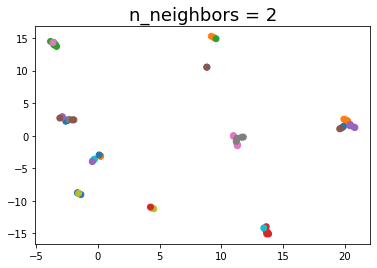

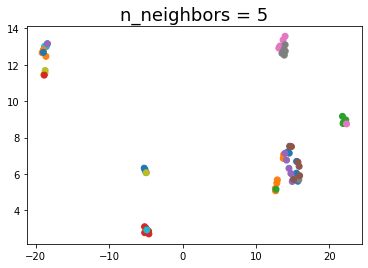

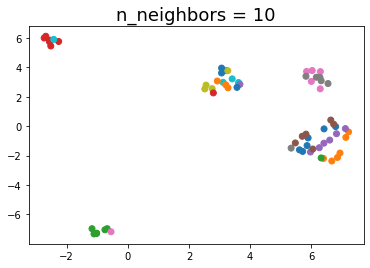

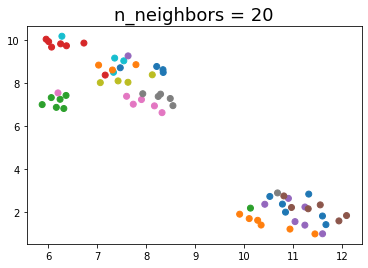

In [10]:
#testing different n-neighbors
for n in (2, 5, 10, 20):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

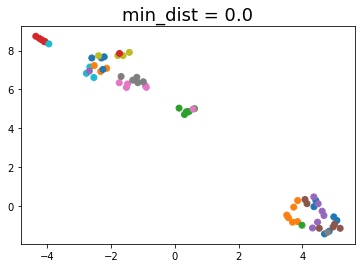

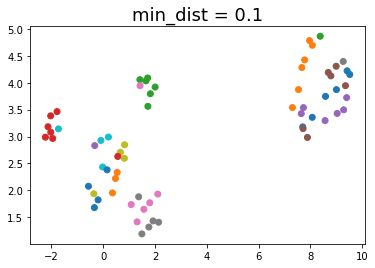

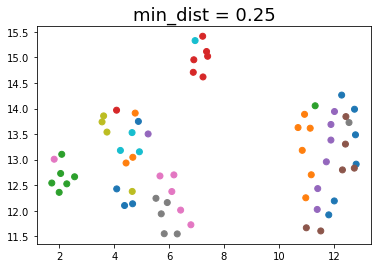

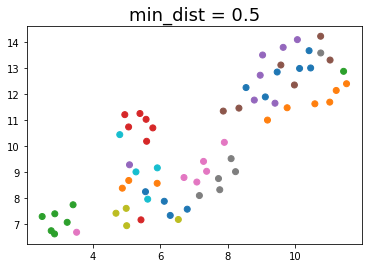

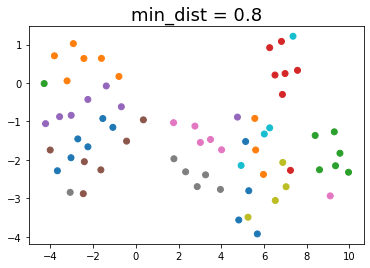

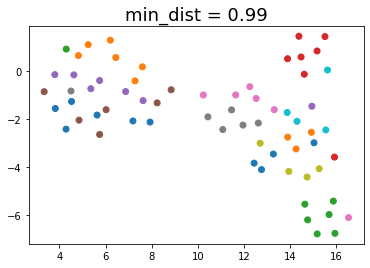

In [11]:
#testing different minimum distances
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

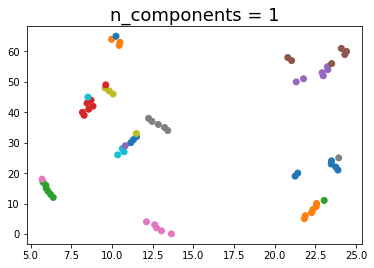

In [12]:
#testing n-components=1
draw_umap(n_components=1, title='n_components = 1')

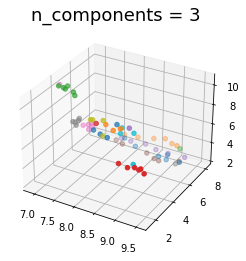

In [13]:
#testing n-components=3
draw_umap(n_components=3, title='n_components = 3')

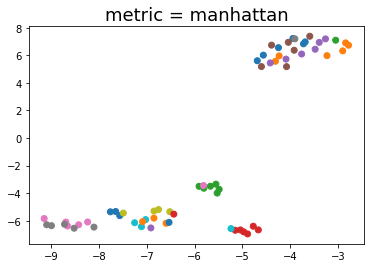

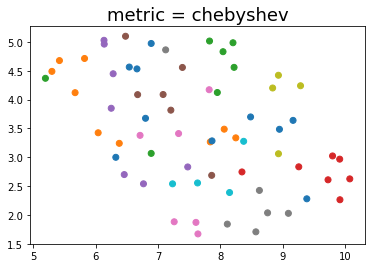

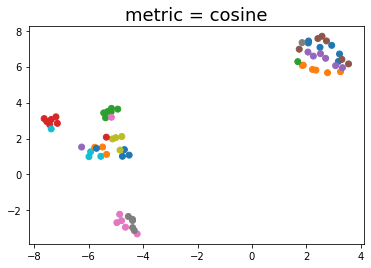

In [14]:
#trying different metrics
for m in ("manhattan", "chebyshev", "cosine"):
    name = m if type(m) is str else m.__name__
    draw_umap(n_components=2, metric=m, title='metric = {}'.format(name))

# Transform data and Fit a new UMAP using best parameters and sklearn pipeline

In [15]:
from umap import UMAP
UMAP = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=42) 

pipe = Pipeline([('scaler', StandardScaler()), ('umap', UMAP)])
pipe.fit(matrix_data)

embedding = pipe.transform(matrix_data)
embedding.shape

(66, 2)

# Create scatterplots of results with:
1. Color points by tissue
2. Shape point by timepoint

In [16]:
palette = sns.color_palette(n_colors=21)

/home/SE/BMIG-6202-MSR/qiime2-2022.2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


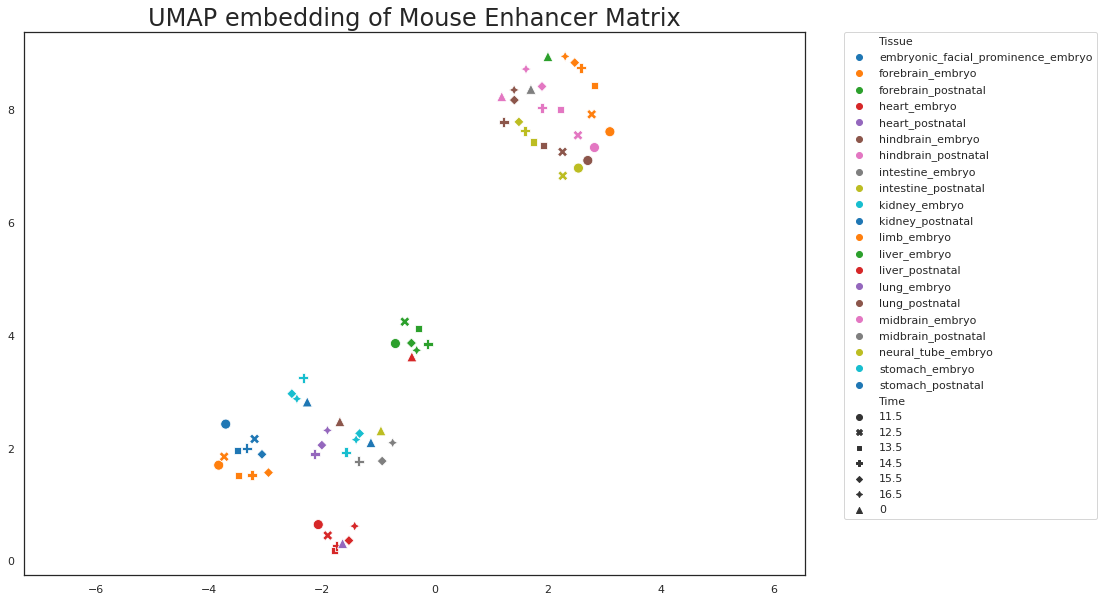

In [17]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
sns.scatterplot(embedding[:, 0], embedding[:, 1],
            hue=matrix['Tissue'],style=matrix['Time'],palette=palette,s=100)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP embedding of Mouse Enhancer Matrix', fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# summary
#The UMAP has captured some distint classes (e.g. red and green), while some classes blend into one another (orange and blue). I did not observe any patterns in Time. 

# Task #2: Predicting CTCF binding

CTCF is a transcription factor (TF) that is involved in many cellular processes. It has been shown to bind at promoters, enhancers, and insulators as well as mediate 3D chromatin interactions. Therefore we are interested in characterizing its binding sites and binding partners (i.e., TFs that it binds with).

Your task is to build a linear regression model to (i) predict CTCF signal at candidate cis-regulatory elements (cCREs) using other TF signals and to (ii) determine which TFs that are predictive of CTCF binding (i.e., the most important features)

Datasets

We have a matrix containing transcription factor (TF) ChIP-seq signal for 127 TFs at 10,407 cCREs on chromosome 1. 

    Col 1: cCRE ID
    Col 2: CTCF signal (what you are trying to predict)
    Col 3 - 128: signals of 126 other TFs

    Chromosome 1 matrix (for model training): Chrom 1 Matrix
    Chromosome 2 matrix (for validation): Chrom 2 Matrix 

Tasks:

1. First determine which TFs are most predictive for CTCF binding. 

    Build a linear regression model using the chromosome 1 data that models CTCF signal (y) as a 
    linear combination of the 126 TF signals (x's). 
        
        What is the R2 value of this model? 
        What are the five most important features of the model? 
        What is the biological significance of these TFs? Would we expect them to predict CTCF 
        binding?

2. Write a short paragraph summarizing these results.

3. Validate the model using data from chromosome 2. 

4. What is the mean square error for a model trained on the chromosome 1 data but evaluated on the chromosome 2 data?

# import modules

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# import data

In [19]:
chromosome_matrix=pd.read_csv("TF-Matrix.chr1.txt", sep = '\t')
#remove empty column
chromosome_matrix=chromosome_matrix.drop(labels='Unnamed: 128', axis=1)
#take a peak
chromosome_matrix[0:]

,cCRE,CTCF,ASH2L,ATF2,ATF7,BATF,BCL11A,BCL3,BCLAF1,BHLHE40,...,ZEB1,ZNF143,ZNF207,ZNF217,ZNF24,ZNF384,ZNF592,ZNF687,ZSCAN29,ZZZ3
0,EH38E0078724,1.141900,0.966854,2.188890,0.691002,6.795400,2.392920,1.625600,3.23174,1.45784,...,1.053490,0.637517,0.972212,0.867020,0.830651,1.014650,1.541170,3.601490,0.846217,0.266719
1,EH38E1070274,0.608820,1.138660,0.915075,1.700300,0.223262,2.708510,0.144813,0.78011,1.25539,...,2.298820,0.421721,1.406400,0.676739,0.946100,0.756368,0.684674,1.092570,1.008030,0.232510
2,EH38E1073973,4.955210,1.282230,3.220930,6.072330,2.783780,3.060970,3.536940,1.62246,1.47039,...,0.357709,8.425570,2.239830,1.143220,3.676670,1.515720,1.158590,1.108030,0.869008,0.592706
3,EH38E1310242,24.255200,0.384366,1.621320,1.064170,0.000000,0.998662,0.261641,1.82777,1.82395,...,0.957643,5.332220,1.069310,1.462700,1.392500,3.341560,1.736810,0.991999,0.743735,0.238827
4,EH38E1310413,44.447900,1.522690,2.197080,1.031420,1.892720,0.925301,0.407060,1.90325,7.83313,...,0.895724,7.185560,0.986074,1.299610,1.206740,18.810900,1.468370,0.896588,0.827896,0.151877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10402,EH38E2660301,0.418765,2.646010,6.130010,1.844300,2.420260,4.004380,2.040840,2.74046,9.27435,...,8.348660,0.989978,2.051560,0.863267,0.998650,2.344990,0.839653,0.858820,0.825643,0.016164
10403,EH38E2660302,1.118970,2.442840,4.768840,4.750300,3.472360,2.211920,1.392420,2.64331,9.05229,...,20.131900,2.707270,2.161220,1.123220,0.823765,1.281080,0.889253,1.874600,1.399910,0.091060
10404,EH38E2660307,3.437500,1.878020,2.654980,1.020300,0.659395,2.733300,1.610770,2.62705,2.00703,...,5.843040,1.154600,1.839910,1.009360,0.946024,1.731230,0.890982,1.348500,0.898601,0.123077
10405,EH38E2660308,0.831852,2.715510,5.801670,1.637200,1.570040,2.936900,1.758500,2.56500,5.76192,...,13.178700,5.970050,1.876190,0.660934,1.028620,0.872933,0.785143,2.413380,0.797513,0.039656


In [20]:
#understanding the data
chromosome_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Columns: 128 entries, cCRE to ZZZ3
dtypes: float64(127), object(1)
memory usage: 10.2+ MB


In [21]:
#understanding the data
chromosome_matrix.describe()

,CTCF,ASH2L,ATF2,ATF7,BATF,BCL11A,BCL3,BCLAF1,BHLHE40,BMI1,...,ZEB1,ZNF143,ZNF207,ZNF217,ZNF24,ZNF384,ZNF592,ZNF687,ZSCAN29,ZZZ3
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,...,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5.882849,1.769847,3.446045,3.748756,4.010638,3.360488,1.738831,2.757809,3.544977,1.216912,...,4.229863,1.648569,1.817390,1.298016,1.317783,1.552043,1.092025,1.601433,1.133606,0.252136
std,12.342337,1.018425,2.913239,7.340285,6.388126,3.502450,1.830861,1.889023,5.288467,0.993724,...,5.913760,2.419319,0.742247,0.611643,1.586471,2.395758,0.745919,1.161821,0.716544,0.382932
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045543,0.000000
25%,0.590820,1.087060,1.793345,1.516730,1.404625,1.567190,0.772960,1.738760,1.256325,0.835135,...,1.299510,0.592031,1.323245,0.933106,0.871265,0.667668,0.745359,0.958144,0.797656,0.089547
50%,1.102460,1.542600,2.674300,2.369380,2.156160,2.423120,1.248760,2.426490,2.155020,1.062200,...,2.759970,0.975149,1.694230,1.182530,1.119280,1.036800,0.988001,1.307720,1.028270,0.180940
75%,2.574770,2.179195,4.106380,3.911110,3.573485,3.798945,2.060075,3.331325,3.820925,1.346215,...,5.328955,1.786320,2.169830,1.517680,1.444365,1.633530,1.310665,1.875900,1.316510,0.322271
max,109.385000,12.632400,68.006200,371.359000,74.652300,52.906200,48.815000,43.245900,129.012000,31.028800,...,215.358000,83.397700,8.817410,10.831600,52.027200,56.616500,40.553600,21.277700,27.143500,20.855900


In [22]:
#understanding the data
corr_matrix = chromosome_matrix.corr()
corr_matrix["CTCF"].sort_values(ascending=False)

CTCF               1.000000
RAD21              0.727529
SMC3               0.702835
TRIM22             0.465599
ZNF143             0.330327
                     ...   
RELB              -0.144692
ASH2L             -0.161745
POLR2A            -0.176950
IKZF1             -0.189350
POLR2AphosphoS5   -0.191933
Name: CTCF, Length: 127, dtype: float64

# train the data

In [23]:
X = chromosome_matrix.drop(labels=['CTCF','cCRE'], axis=1)
y = chromosome_matrix["CTCF"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
len(y_test)

3123

In [24]:
lin_reg = LinearRegression().fit(X_train, y_train)

In [25]:
#Let’s try it out on a few instances from the training set
some_data = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [ 8.05770815  3.5077061   4.57524237 34.72266277  2.53363819]
Labels: [5.71957, 0.716662, 0.552486, 28.1724, 1.08907]


In [26]:
#Evaluate Using Cross-Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train,
scoring="neg_mean_squared_error", cv=10)
lin_reg_scores = np.sqrt(-scores)

In [27]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [28]:
display_scores(lin_reg_scores)

Scores: [7.01966086 6.179096   5.16964618 7.72930148 6.6687246  6.78957682
 6.71540151 6.1373101  6.23055187 7.16516203]
Mean: 6.580443144356361
Standard deviation: 0.6629213019577846


# Test the model

In [29]:
# Make predictions using the testing set
y_pred = lin_reg.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 40.31
Coefficient of determination: 0.73


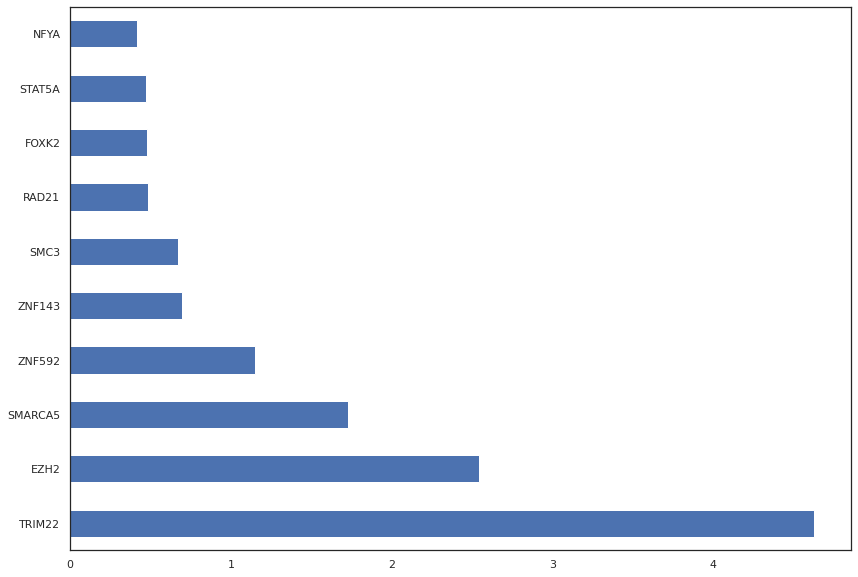

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(lin_reg.coef_, index=X_test.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# import validation data

In [31]:
chromosome2_matrix=pd.read_csv("TF-Matrix.chr2.txt", sep = '\t')
#take a peak
chromosome2_matrix[0:]

,cCRE,CTCF,ASH2L,ATF2,ATF7,BATF,BCL11A,BCL3,BCLAF1,BHLHE40,...,ZEB1,ZNF143,ZNF207,ZNF217,ZNF24,ZNF384,ZNF592,ZNF687,ZSCAN29,ZZZ3
0,EH38E0027215,26.551500,0.664611,3.37907,1.865350,2.342520,1.360480,1.515180,3.24784,1.633230,...,1.819790,2.438710,1.648240,0.653822,0.825046,3.237520,0.785953,0.696753,0.593301,0.364181
1,EH38E1326835,19.605400,0.600382,1.73177,2.605770,1.197670,1.134600,0.400490,1.84476,1.174950,...,0.702905,2.295110,1.859390,1.163270,0.988682,1.317200,1.017590,1.365580,1.009690,0.181077
2,EH38E1327139,30.524100,0.786072,2.39205,0.897490,0.784373,0.411152,0.523638,2.33513,1.709140,...,0.989349,6.739650,1.066750,1.303800,1.697450,1.258620,1.214380,1.445570,1.467360,0.850621
3,EH38E1327300,21.313800,1.244450,2.86446,2.726010,2.631160,1.386970,0.606328,2.94974,4.520240,...,0.000000,10.529900,1.684560,1.403550,1.309280,3.289710,2.233690,0.876585,1.193760,0.416315
4,EH38E1327306,28.917300,0.708394,1.37012,0.923346,1.875230,0.695671,0.644188,1.03264,0.582483,...,0.082080,4.029340,0.847331,0.595162,0.237928,0.517568,1.255070,0.311165,0.484083,0.493973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7235,EH38E2732859,0.765410,0.976066,4.81176,4.095870,2.720720,3.208710,1.989490,2.14997,17.893900,...,12.397700,5.156950,2.351950,0.537189,0.481123,1.155170,0.428072,0.511677,0.637333,0.028242
7236,EH38E2732860,4.490060,1.156110,2.46420,3.121780,2.593580,1.504500,0.603343,2.60101,8.710220,...,3.000030,0.846377,1.665410,0.950353,0.770741,1.056570,0.873866,1.008400,0.921543,0.151277
7237,EH38E2732861,0.350272,0.743857,2.18821,3.798970,1.218580,2.280570,0.971988,1.74540,2.365770,...,1.715890,0.453955,1.401400,0.854901,0.913510,1.172370,0.777838,1.041220,0.813107,0.311935
7238,EH38E2732875,1.043110,1.331220,2.45947,2.726530,3.338340,2.231760,0.601371,3.20561,3.192040,...,0.193824,0.987640,1.697320,1.308870,1.360250,0.644455,0.908924,1.509730,1.114600,0.166420


# make predictions on validation data

In [32]:
X2 = chromosome2_matrix.drop(labels=['CTCF','cCRE'], axis=1)
y2 = chromosome2_matrix["CTCF"].copy()
# Make predictions using the ...
y2_pred = lin_reg.predict(X2)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y2, y2_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y2, y2_pred))

Mean squared error: 37.88
Coefficient of determination: 0.71


# summary
The mean squared error and coefficient of determination for the validation data and training data were similar: approx. 40% and 0.7, respectively. As shown on line #30, TRIM22, RAD21, etc were important in predicting CTCF, which was expected from the corr_matrix in line #22. 